In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import boxcox

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [3]:
sales_of_company_x.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


## Отображение графика временного ряда

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

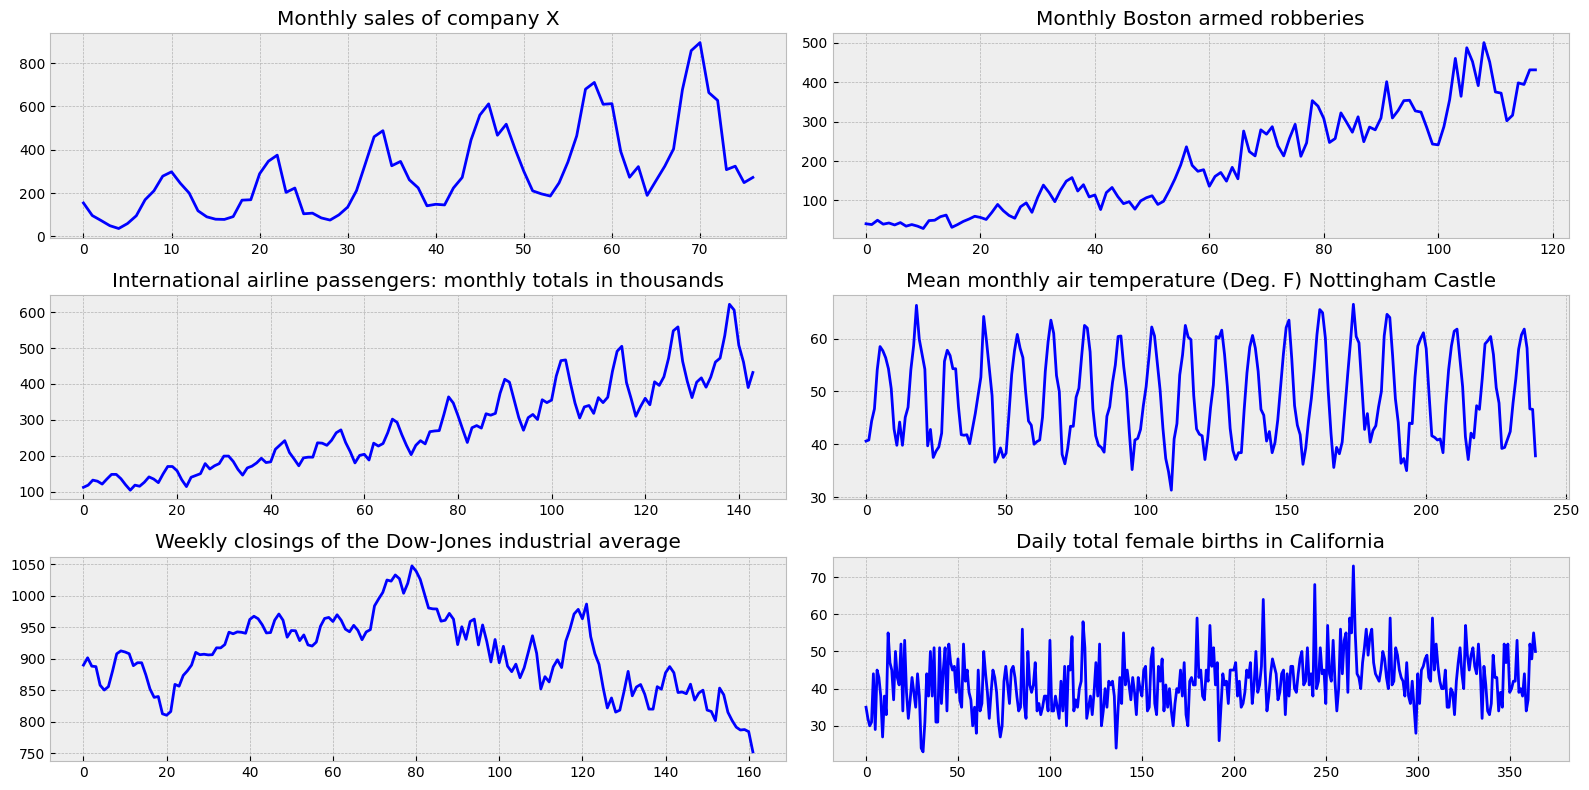

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

## Нормализация дисперсии

Для этого будет использовать преобразование boxcox, что соответствует логарифмированию:

In [10]:
airlines_passengers.head()

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Первичный график:

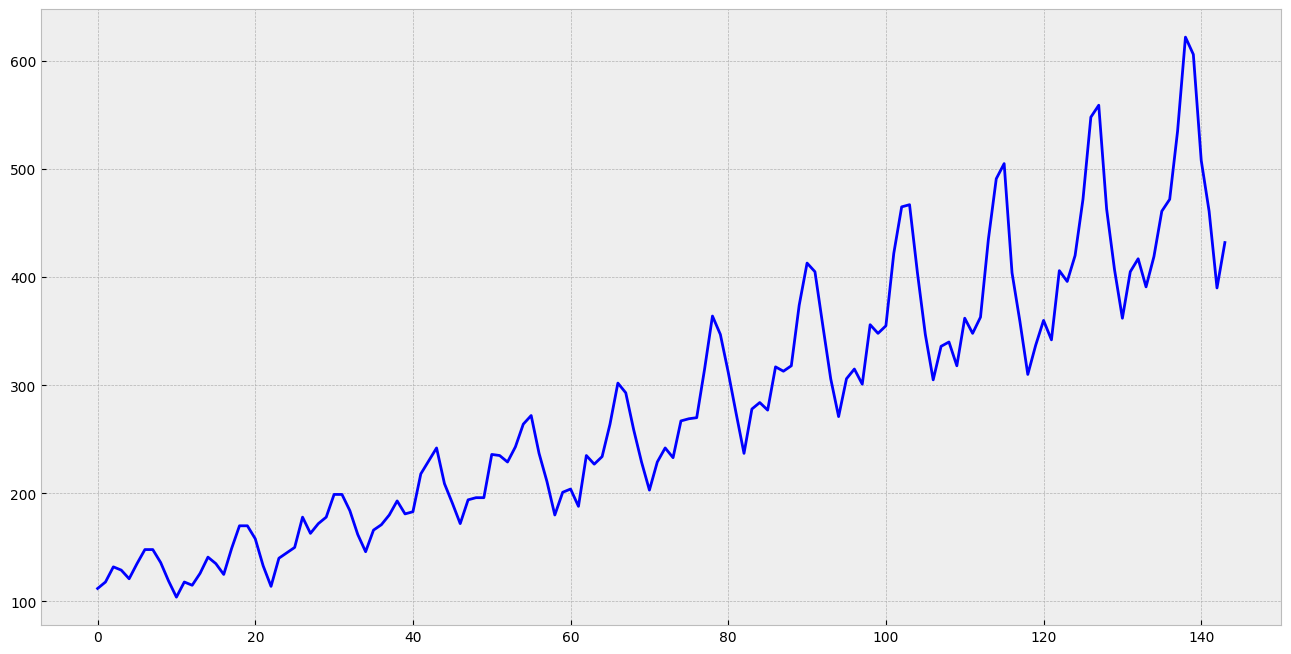

In [12]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    airlines_passengers["Count"].plot(color='blue')

Применяем логарифмирование:

In [32]:
series = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

In [50]:
series.shape

(143,)

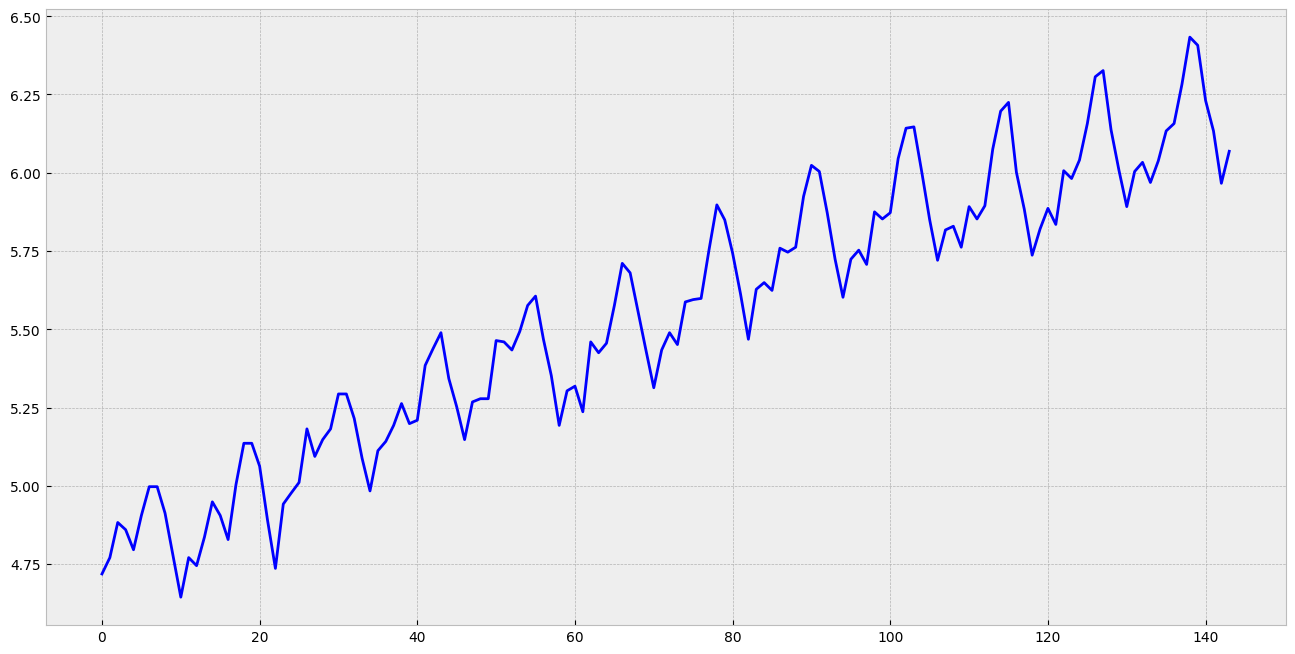

In [34]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    plt.plot(series, color='blue')

## Избавляемся от тренда

Для этого дифференцируем временной ряд с лагом 1

In [35]:
series = np.diff(series, 1)

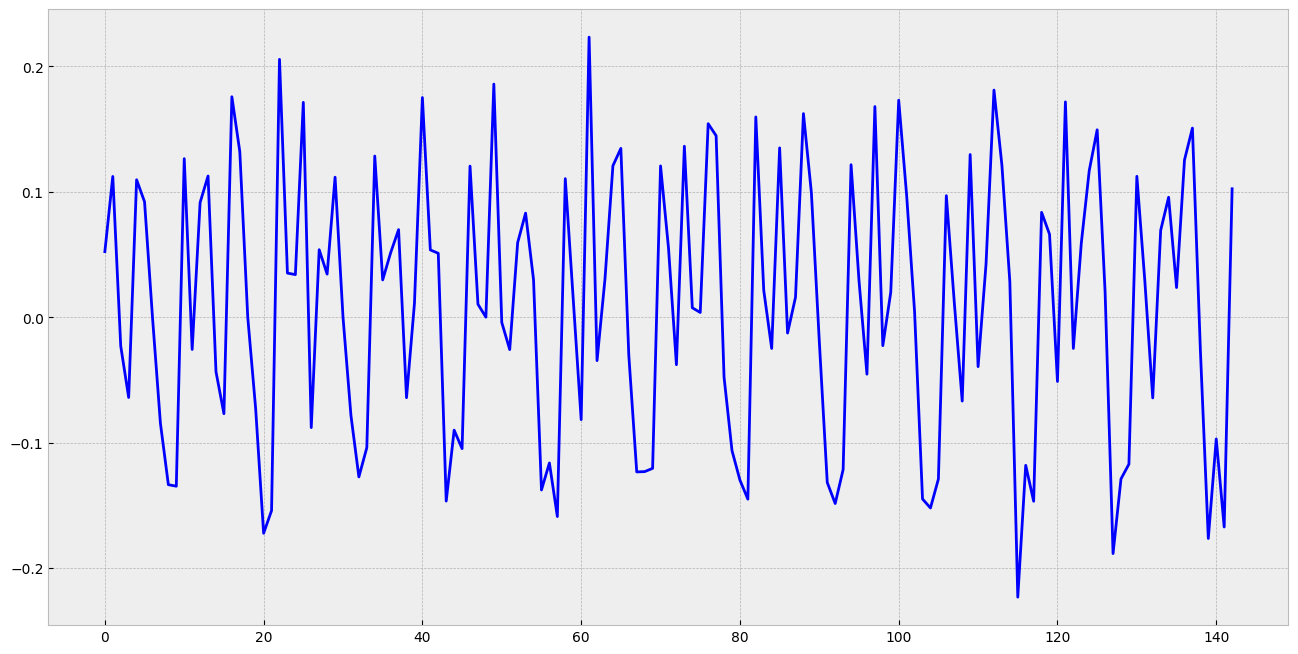

In [36]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    plt.plot(series, color='blue')

## Тест Дики-Фуллера

Если значение **p-value** < 0.05, то временной ряд стационарный

In [37]:
dfuller = adfuller(series, autolag='AIC')

In [38]:
dfuller

(-2.717130598388114,
 0.07112054815086184,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

In [39]:
dfoutput = pd.Series(dfuller[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

In [40]:
dfoutput

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
dtype: float64

## Коррелограмма

In [41]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

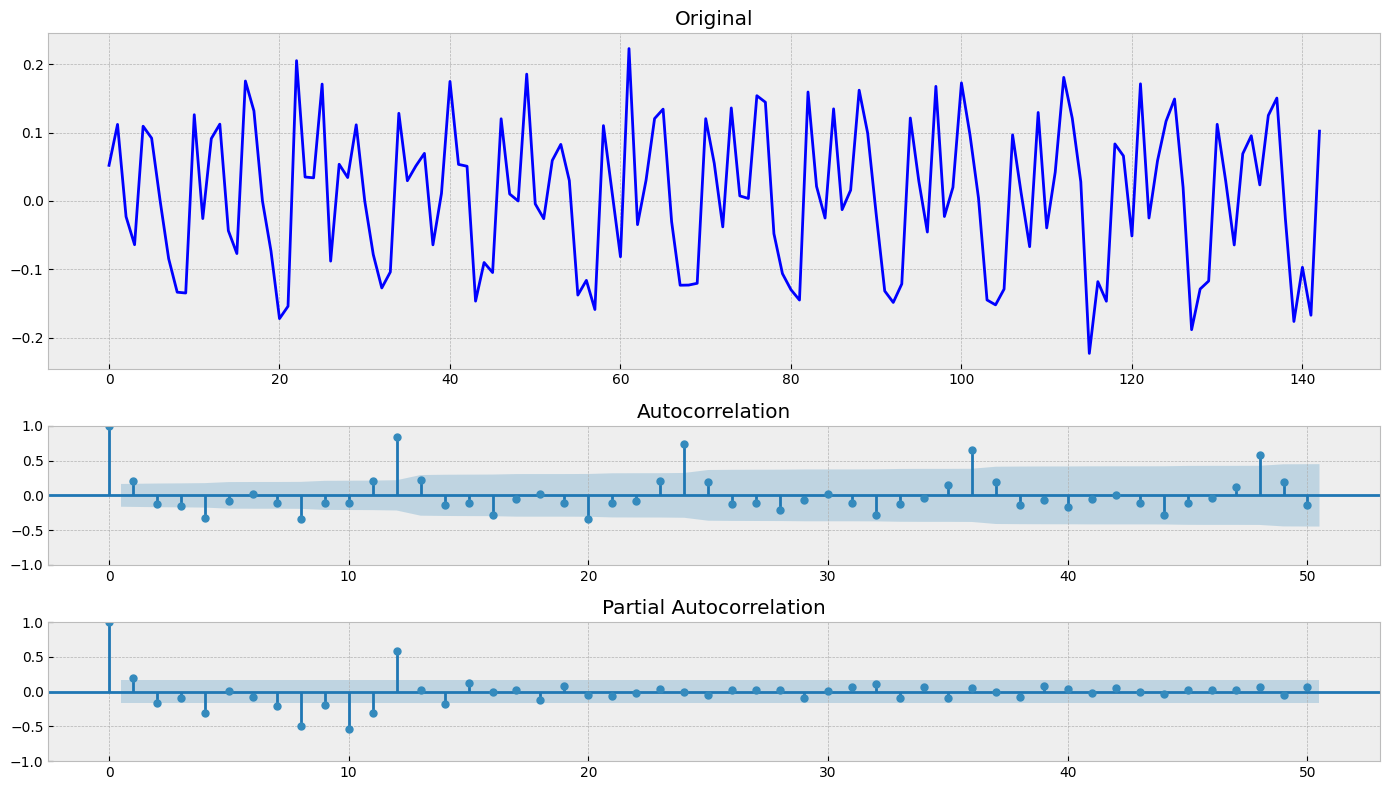

In [47]:
tsplot(series, lags=50)

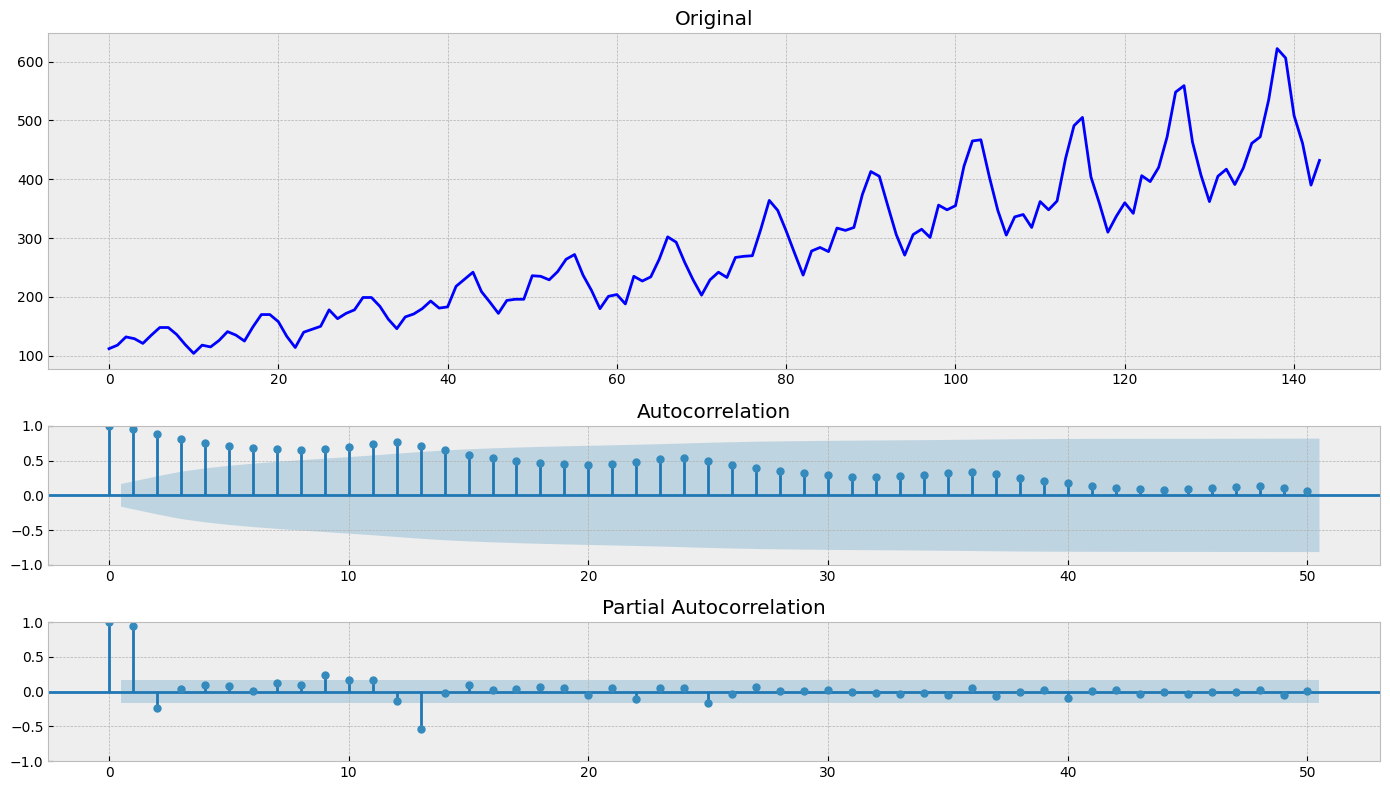

In [48]:
tsplot(all_series["International airline passengers: monthly totals in thousands"], lags=50)